In [213]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing

In [214]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls',names=None,index_col=None)
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [215]:
#Fill missing values are filled with the mean values from the non-missing values
df1 = df.where(pd.notnull(df), df.mean(), axis='columns')

In [216]:
z,y = np.unique(df1['Genotype'].values, return_inverse=True)
y

array([0, 0, 0, ..., 1, 1, 1])

In [217]:
X = df1.iloc[:,1:78]
Xs = preprocessing.scale(X)

logreg = linear_model.LogisticRegression(C=1)
logreg.fit(Xs, y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [218]:
yhat = logreg.predict(Xs)
acc = np.mean(yhat == y)
print("Accuracy on training data = %f" % acc)

Accuracy on training data = 0.985185


In [219]:
data = {'feature': X.columns, 'slope': np.squeeze(logreg.coef_)}
dfslope = pd.DataFrame(data=data)
dfslope

,feature,slope
0,DYRK1A_N,0.257882
1,ITSN1_N,3.088867
2,BDNF_N,0.202674
3,NR1_N,-0.786476
4,NR2A_N,-0.324190
5,pAKT_N,0.745076
6,pBRAF_N,0.212250
7,pCAMKII_N,-0.366269
8,pCREB_N,0.859235
9,pELK_N,-0.954124


<Container object of 3 artists>

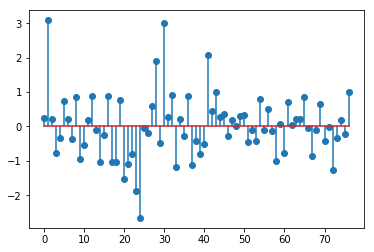

In [220]:
plt.stem(dfslope.index,dfslope['slope'])

In [221]:
Isel = (-dfslope['slope']).argsort()[:2]
print("The gene with the largest w is %s"% dfslope.feature[Isel[0]])
print("The gene with the second largest w is %s"% dfslope.feature[Isel[1]])

The gene with the largest w is ITSN1_N
The gene with the second largest w is APP_N


In [222]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import  sklearn.model_selection

nfold = 10
prec = []
rec = []
f1 = []
acc = []

kf = sklearn.model_selection.KFold(n_splits=nfold,shuffle=True)

for train, test in kf.split(Xs): 
       
    # Get training and test data
    Xtr = Xs[train,:]
    ytr = y[train]
    Xts = Xs[test,:]
    yts = y[test]
    
    # Fit a model
    logreg.fit(Xtr, ytr)
    yhat = logreg.predict(Xts)
    
    # Measure performance
    preci,reci,f1i,_= precision_recall_fscore_support(yts,yhat,average='binary') 
    prec.append(preci)
    rec.append(reci)
    f1.append(f1i)
    acci = np.mean(yhat == yts)
    acc.append(acci)

# Take average values of the metrics
precm = np.mean(prec)
recm = np.mean(rec)
f1m = np.mean(f1)
accm= np.mean(acc)

# Compute the standard errors
prec_se = np.std(prec)/np.sqrt(nfold-1)
rec_se = np.std(rec)/np.sqrt(nfold-1)
f1_se = np.std(f1)/np.sqrt(nfold-1)
acc_se = np.std(acc)/np.sqrt(nfold-1)

print('Precision = {0:.4f}, SE={1:.4f}'.format(precm,prec_se))
print('Recall =    {0:.4f}, SE={1:.4f}'.format(recm, rec_se))
print('f1 =        {0:.4f}, SE={1:.4f}'.format(f1m, f1_se))
print('Accuracy =  {0:.4f}, SE={1:.4f}'.format(accm, acc_se))

Precision = 0.9781, SE=0.0063
Recall =    0.9652, SE=0.0067
f1 =        0.9713, SE=0.0037
Accuracy =  0.9731, SE=0.0035


In [223]:
z2,y2 = np.unique(df1['class'].values, return_inverse=True)
y2

array([0, 0, 0, ..., 7, 7, 7])

In [224]:
logreg = linear_model.LogisticRegression(C=1)
logreg.fit(Xs, y2)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [225]:
yhat = logreg.predict(Xs)
acc = np.mean(yhat == y2)
print("Accuracy on training data = %f" % acc)

Accuracy on training data = 0.999074


In [226]:
prec = []
rec = []
f1 = []
acc = []

for train, test in kf.split(Xs):            
    # Get training and test data
    Xtr = Xs[train,:]
    ytr = y2[train]
    Xts = Xs[test,:]
    yts = y2[test]
    
    # Fit a model
    logreg.fit(Xtr, ytr)
    yhat = logreg.predict(Xts)
    
    # Measure performance
    preci,reci,f1i,_= precision_recall_fscore_support(yts,yhat,average='macro') 
    prec.append(preci)
    rec.append(reci)
    f1.append(f1i)
    acci = np.mean(yhat == yts)
    acc.append(acci)
    
    # confusion matrix
    C0 = confusion_matrix(yts, yhat)
    C = C0 / C0.astype(np.float).sum(axis=1)
    print(np.array_str(C, precision=4, suppress_small=True))

# Take average values of the metrics
precm = np.mean(prec)
recm = np.mean(rec)
f1m = np.mean(f1)
accm= np.mean(acc)

# Compute the standard errors
prec_se = np.std(prec)/np.sqrt(nfold-1)
rec_se = np.std(rec)/np.sqrt(nfold-1)
f1_se = np.std(f1)/np.sqrt(nfold-1)
acc_se = np.std(acc)/np.sqrt(nfold-1)

print('Precision = {0:.4f}, SE={1:.4f}'.format(precm,prec_se))
print('Recall =    {0:.4f}, SE={1:.4f}'.format(recm, rec_se))
print('f1 =        {0:.4f}, SE={1:.4f}'.format(f1m, f1_se))
print('Accuracy =  {0:.4f}, SE={1:.4f}'.format(accm, acc_se))

[[ 0.9524  0.      0.      0.      0.0909  0.      0.      0.    ]
 [ 0.      1.      0.      0.      0.      0.      0.      0.    ]
 [ 0.      0.      1.      0.      0.      0.      0.      0.    ]
 [ 0.0476  0.      0.      0.9412  0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      1.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      1.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      1.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      1.    ]]
[[ 0.9     0.      0.      0.      0.0833  0.      0.      0.    ]
 [ 0.      0.9474  0.      0.      0.0833  0.      0.      0.    ]
 [ 0.      0.      1.      0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      1.      0.      0.      0.      0.    ]
 [ 0.      0.1053  0.      0.      0.8333  0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      1.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      1.      0.

<Container object of 3 artists>

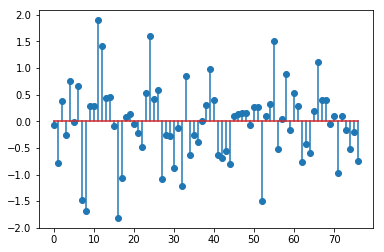

In [227]:
logreg = linear_model.LogisticRegression(C=1)
logreg.fit(Xs,y2)

w2 = np.squeeze(logreg.coef_)
plt.stem(dfslope.index,w2[0])

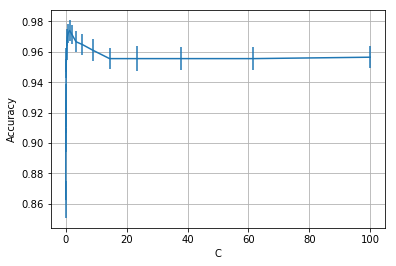

In [228]:
nc = 20
c = np.logspace(-2,2,nc)
acc = np.zeros((nc,nfold))

for ifold, ind in enumerate(kf.split(Xs)):
    
    # Get training and test data
    Itr,Its = ind
    Xtr = Xs[Itr,:]
    ytr = y[Itr]
    Xts = Xs[Its,:]
    yts = y[Its]
    
    for ia, a in enumerate(c):
    
        # Fit a model
        logreg = linear_model.LogisticRegression(C=a,penalty='l1')
        logreg.fit(Xtr, ytr)
        yhat = logreg.predict(Xts)

        # Measure accutacy
        acc[ia,ifold] = logreg.score(Xts,yts)
        
# Take average values of the metrics
accm = np.mean(acc,axis=1)
acc_se = np.std(acc,axis=1)/np.sqrt(nfold-1)

plt.errorbar(c, accm, yerr=acc_se, fmt='-')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [229]:
i = (-accm).argsort()[:1]
print("Optimal C = %f" % c[i[0]])

Optimal C = 1.274275


<Container object of 3 artists>

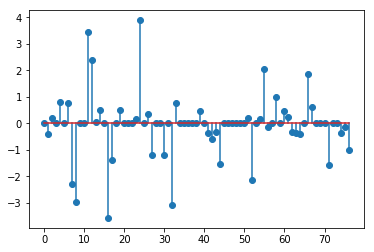

In [230]:
logreg = linear_model.LogisticRegression(C=c[i[0]],penalty='l1')
logreg.fit(Xs,y2)

w_l1 = np.squeeze(logreg.coef_)
plt.stem(dfslope.index,w_l1[0])